**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/TeaCoffeeBreak/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


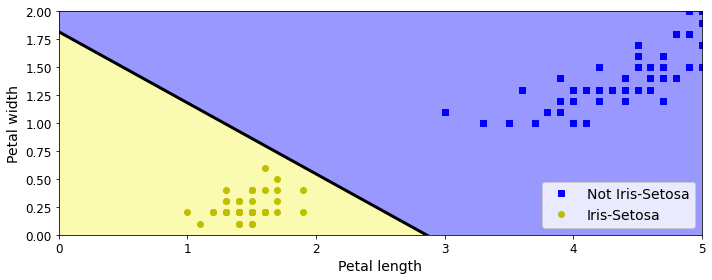

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


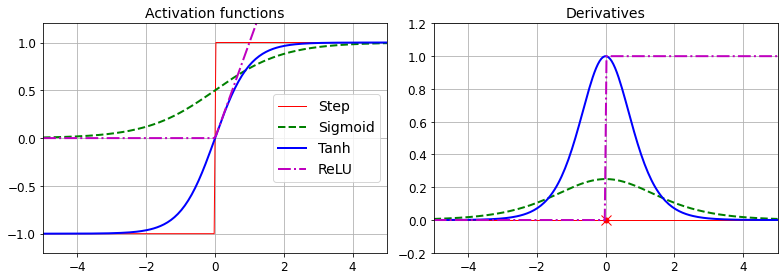

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

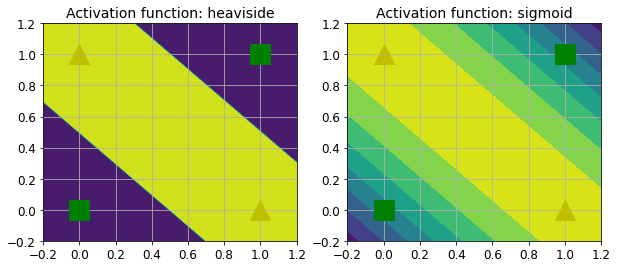

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.5.0-dev20210106'

In [11]:
keras.__version__

'2.5.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [13]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [14]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

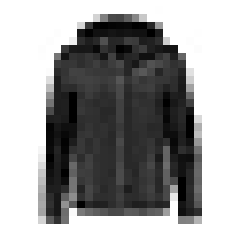

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [19]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


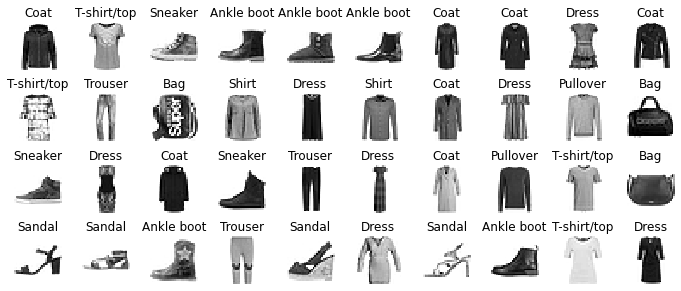

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


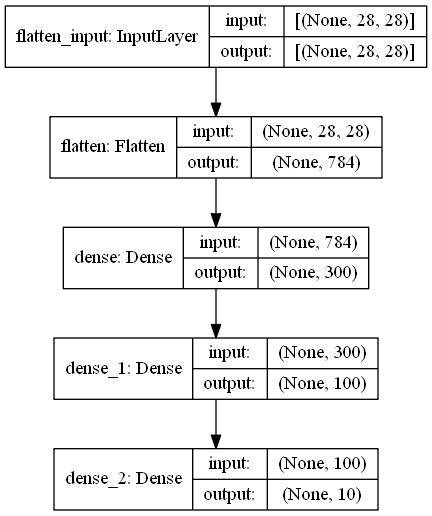

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 1ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 930us/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 2s 951us/step - loss: 0.4483 - accuracy: 0.8427 - val_loss: 0.5318 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4207 - accuracy: 0.8529 - val_loss: 0.3914 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4061 - accuracy: 0.8581 - val_loss: 0.3741 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 963us/step - loss: 0.3754 - accuracy: 0.8673 - val_loss: 0.3715 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 2s 937us/step - loss: 0.3654 - accuracy: 0.8706 - val_loss: 0.3613 - val_a

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


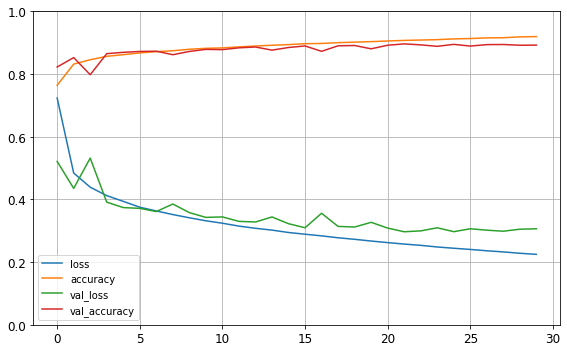

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 638us/step - loss: 0.3394 - accuracy: 0.8818


[0.33938971161842346, 0.8817999958992004]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)
y_pred

f:\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


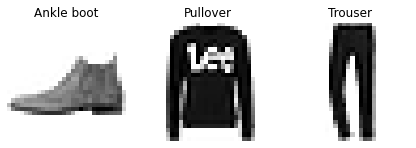

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - ETA: 0s - loss: 2.302 - 1s 829us/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 619us/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 605us/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 599us/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 613us/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 616us/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 613us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 605us/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 616us/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 

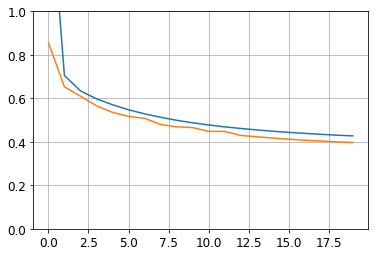

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 898us/step - loss: 1.9731 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 630us/step - loss: 0.7638 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 693us/step - loss: 0.6045 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 652us/step - loss: 0.5862 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 652us/step - loss: 0.5452 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 638us/step - loss: 0.5243 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 627us/step - loss: 0.5185 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 663us/step - loss: 0.4947 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 646us/step - loss: 0.4782 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 638us/step - loss: 0.470

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 950us/step - loss: 3.1941 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 657us/step - loss: 0.7247 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 685us/step - loss: 0.6176 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 724us/step - loss: 0.5799 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 746us/step - loss: 0.5409 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 688us/step - loss: 0.5173 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 693us/step - loss: 0.5186 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 710us/step - loss: 0.4977 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 699us/step - loss: 0.4765 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 740us/step - loss: 0.467

Adding an auxiliary output for regularization:

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [62]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.4633 - main_output_loss: 3.3289 - aux_output_loss: 4.6732 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 768us/step - loss: 0.9807 - main_output_loss: 0.7503 - aux_output_loss: 3.0537 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 785us/step - loss: 0.7742 - main_output_loss: 0.6290 - aux_output_loss: 2.0810 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 749us/step - loss: 0.6952 - main_output_loss: 0.5897 - aux_output_loss: 1.6449 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 790us/step - loss: 0.6469 - main_output_loss: 0.5508 - aux_output_loss: 1.5118 - 

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 503us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# The subclassing API

In [65]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [66]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.3855 - output_1_loss: 3.3304 - output_2_loss: 3.8821 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 762us/step - loss: 1.0790 - output_1_loss: 0.9329 - output_2_loss: 2.3942 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 751us/step - loss: 0.8644 - output_1_loss: 0.7583 - output_2_loss: 1.8194 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 757us/step - loss: 0.7850 - output_1_loss: 0.6979 - output_2_loss: 1.5689 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - ETA: 0s - loss: 0.7296 - output_1_loss: 0.6501 - output_2_loss: 1.445 - 0s 782us/step - loss: 0.7294 - output_1_loss: 0.64

In [67]:
model = WideAndDeepModel(30, activation="relu")

# Saving and Restoring

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 859us/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 660us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 655us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 646us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 638us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 624us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 622us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 630us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 624us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 404us/step - loss: 0.438

In [71]:
model.save("my_keras_model.h5")

In [72]:
model = keras.models.load_model("my_keras_model.h5")

In [73]:
model.predict(X_new)

array([[0.5400236],
       [1.6505969],
       [3.0098243]], dtype=float32)

In [74]:
model.save_weights("my_keras_weights.ckpt")

In [75]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 854us/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 624us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 630us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 657us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 635us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 638us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 663us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 635us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 627us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 478us/step - loss: 0.438

In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 840us/step - loss: 0.4578 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 638us/step - loss: 0.4430 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 646us/step - loss: 0.4376 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - ETA: 0s - loss: 0.437 - 0s 641us/step - loss: 0.4361 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 619us/step - loss: 0.4204 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 635us/step - loss: 0.4112 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 641us/step - loss: 0.4226 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 635us/step - loss: 0.4135 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 633us/step - loss: 0.4039 - val_loss: 0.3746
Epoch 10/100
363/363 [===========================

Epoch 79/100
363/363 [==============================] - 0s 624us/step - loss: 0.3310 - val_loss: 0.3347
Epoch 80/100
363/363 [==============================] - 0s 641us/step - loss: 0.3323 - val_loss: 0.3354
Epoch 81/100
363/363 [==============================] - 0s 638us/step - loss: 0.3297 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - ETA: 0s - loss: 0.344 - 0s 638us/step - loss: 0.3441 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 619us/step - loss: 0.3369 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 633us/step - loss: 0.3182 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 635us/step - loss: 0.3235 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 627us/step - loss: 0.3184 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 635us/step - loss: 0.3395 - val_loss: 0.3529
Epoch 88/100
363/363 [==================

In [80]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 757us/step - loss: 0.3302 - val_loss: 0.3556

val/train: 1.08


# TensorBoard

In [82]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [83]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_02_19-17_10_41'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 666us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 666us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 630us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 660us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 638us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 671us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 649us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 644us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 638us/step - loss: 0.4549 

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [87]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2021-02-19 17:10:55.524583: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-02-19 17:10:55.525901: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "f:\python38\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "f:\python38\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "F:\Python38\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "f:\python38\lib\site-packages\tensorboard\main.py", line 71, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "f:\python38\lib\site-packages\absl\app.py", line 300, in run
    _run_main(main, args)
  File "f:\python38\lib\site-packag

In [88]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2021_02_19-17_10_59'

In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [91]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 702us/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 660us/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 627us/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 635us/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 666us/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 644us/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - ETA: 0s - loss: 1.349 - 0s 660us/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 666us/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [============================

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [92]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [95]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [96]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 840us/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 605us/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 599us/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 602us/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 599us/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 635us/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 605us/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 599us/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 591us/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 622us/step - 

Epoch 80/100
363/363 [==============================] - 0s 616us/step - loss: 0.3374 - val_loss: 0.3595
Epoch 81/100
363/363 [==============================] - 0s 586us/step - loss: 0.3381 - val_loss: 0.3432
Epoch 82/100
363/363 [==============================] - 0s 619us/step - loss: 0.3481 - val_loss: 0.3211
Epoch 83/100
363/363 [==============================] - 0s 605us/step - loss: 0.3441 - val_loss: 0.3342
Epoch 84/100
363/363 [==============================] - 0s 610us/step - loss: 0.3240 - val_loss: 0.4136
Epoch 85/100
363/363 [==============================] - 0s 599us/step - loss: 0.3303 - val_loss: 0.3285
Epoch 86/100
363/363 [==============================] - 0s 630us/step - loss: 0.3263 - val_loss: 0.3440
Epoch 87/100
363/363 [==============================] - 0s 610us/step - loss: 0.3483 - val_loss: 0.3733
Epoch 88/100
363/363 [==============================] - 0s 599us/step - loss: 0.3305 - val_loss: 0.3188
Epoch 89/100
363/363 [==============================] - 0s 619us

In [97]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 429us/step - loss: 0.3409


In [98]:
y_pred = keras_reg.predict(X_new)

In [99]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon.

In [100]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 4.6276 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 0s 668us/step - loss: 1.5234 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 0s 664us/step - loss: 0.9184 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 0s 668us/step - loss: 0.7683 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 0s 660us/step - loss: 0.6916 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 0s 697us/step - loss: 0.6558 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 0s 668us/step - loss: 0.6644 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 0s 672us/step - loss: 0.6308 - val_loss: 0.8605
Epoch 9/100
242/242 [==============================] - 0s 718us/step - loss: 0.6182 - val_loss: 0.6524
Epoch 10/100
2

242/242 [==============================] - 0s 676us/step - loss: 0.5377 - val_loss: 0.7873
Epoch 9/100
242/242 [==============================] - 0s 660us/step - loss: 0.5345 - val_loss: 0.5968
Epoch 10/100
242/242 [==============================] - 0s 651us/step - loss: 0.5096 - val_loss: 0.4951
Epoch 11/100
242/242 [==============================] - 0s 676us/step - loss: 0.5419 - val_loss: 0.7591
Epoch 12/100
242/242 [==============================] - 0s 672us/step - loss: 0.5164 - val_loss: 0.5368
Epoch 13/100
242/242 [==============================] - 0s 656us/step - loss: 0.4886 - val_loss: 0.4968
Epoch 14/100
242/242 [==============================] - 0s 664us/step - loss: 0.5110 - val_loss: 0.5778
Epoch 15/100
242/242 [==============================] - 0s 664us/step - loss: 0.5475 - val_loss: 0.5117
Epoch 16/100
242/242 [==============================] - 0s 668us/step - loss: 0.5359 - val_loss: 0.7055
Epoch 17/100
242/242 [==============================] - 0s 664us/step - loss: 

Epoch 18/100
242/242 [==============================] - 0s 759us/step - loss: 0.4899 - val_loss: 0.4524
Epoch 19/100
242/242 [==============================] - 0s 751us/step - loss: 0.4692 - val_loss: 0.4476
Epoch 20/100
242/242 [==============================] - 0s 763us/step - loss: 0.4681 - val_loss: 0.4383
Epoch 21/100
242/242 [==============================] - 0s 772us/step - loss: 0.4555 - val_loss: 0.4355
Epoch 22/100
242/242 [==============================] - 0s 797us/step - loss: 0.4393 - val_loss: 0.4282
Epoch 23/100
242/242 [==============================] - 0s 755us/step - loss: 0.4564 - val_loss: 0.4230
Epoch 24/100
242/242 [==============================] - 0s 747us/step - loss: 0.4370 - val_loss: 0.4166
Epoch 25/100
242/242 [==============================] - 0s 751us/step - loss: 0.4397 - val_loss: 0.4161
Epoch 26/100
242/242 [==============================] - 0s 751us/step - loss: 0.4248 - val_loss: 0.4142
Epoch 27/100
242/242 [==============================] - 0s 764us

242/242 [==============================] - 0s 793us/step - loss: 1.2441 - val_loss: 1.2079
Epoch 3/100
242/242 [==============================] - 0s 797us/step - loss: 0.8593 - val_loss: 0.8075
Epoch 4/100
242/242 [==============================] - 0s 772us/step - loss: 0.7813 - val_loss: 0.7207
Epoch 5/100
242/242 [==============================] - 0s 759us/step - loss: 0.7201 - val_loss: 0.6952
Epoch 6/100
242/242 [==============================] - 0s 759us/step - loss: 0.6827 - val_loss: 0.6614
Epoch 7/100
242/242 [==============================] - 0s 755us/step - loss: 0.6703 - val_loss: 0.6378
Epoch 8/100
242/242 [==============================] - 0s 759us/step - loss: 0.6521 - val_loss: 0.6132
Epoch 9/100
242/242 [==============================] - 0s 822us/step - loss: 0.6350 - val_loss: 0.6043
Epoch 10/100
242/242 [==============================] - 0s 747us/step - loss: 0.5927 - val_loss: 0.5937
Epoch 11/100
242/242 [==============================] - 0s 776us/step - loss: 0.5958

242/242 [==============================] - 0s 743us/step - loss: 0.6127 - val_loss: 0.9875
Epoch 16/100
242/242 [==============================] - 0s 759us/step - loss: 0.5844 - val_loss: 0.9345
Epoch 17/100
242/242 [==============================] - 0s 759us/step - loss: 0.6108 - val_loss: 0.8832
Epoch 18/100
242/242 [==============================] - 0s 759us/step - loss: 0.5836 - val_loss: 0.8424
Epoch 19/100
242/242 [==============================] - 0s 734us/step - loss: 0.5577 - val_loss: 0.8079
Epoch 20/100
242/242 [==============================] - 0s 743us/step - loss: 0.5619 - val_loss: 0.7646
Epoch 21/100
242/242 [==============================] - 0s 726us/step - loss: 0.5377 - val_loss: 0.7347
Epoch 22/100
242/242 [==============================] - 0s 751us/step - loss: 0.5261 - val_loss: 0.7075
Epoch 23/100
242/242 [==============================] - 0s 722us/step - loss: 0.5350 - val_loss: 0.6815
Epoch 24/100
242/242 [==============================] - 0s 751us/step - loss:

242/242 [==============================] - ETA: 0s - loss: 0.616 - 0s 747us/step - loss: 0.6149 - val_loss: 0.6027
Epoch 23/100
242/242 [==============================] - 0s 747us/step - loss: 0.5979 - val_loss: 0.6369
Epoch 24/100
242/242 [==============================] - 0s 797us/step - loss: 0.5640 - val_loss: 0.6922
Epoch 25/100
242/242 [==============================] - 0s 793us/step - loss: 0.5534 - val_loss: 0.7604
Epoch 26/100
242/242 [==============================] - 0s 763us/step - loss: 0.5521 - val_loss: 0.8304
Epoch 27/100
242/242 [==============================] - 0s 776us/step - loss: 0.5661 - val_loss: 0.8810
Epoch 28/100
242/242 [==============================] - 0s 739us/step - loss: 0.5517 - val_loss: 0.9624
Epoch 29/100
242/242 [==============================] - 0s 734us/step - loss: 0.5452 - val_loss: 0.9578
Epoch 30/100
121/121 [==============================] - 0s 417us/step - loss: 0.5490
[CV] END learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24; 

242/242 [==============================] - 0s 971us/step - loss: 0.4271 - val_loss: 0.4381
Epoch 69/100
242/242 [==============================] - 0s 822us/step - loss: 0.4010 - val_loss: 0.4341
Epoch 70/100
242/242 [==============================] - 0s 826us/step - loss: 0.4111 - val_loss: 0.4395
Epoch 71/100
242/242 [==============================] - 0s 851us/step - loss: 0.4344 - val_loss: 0.4340
Epoch 72/100
242/242 [==============================] - 0s 788us/step - loss: 0.3948 - val_loss: 0.4407
Epoch 73/100
242/242 [==============================] - 0s 1000us/step - loss: 0.4121 - val_loss: 0.4309
Epoch 74/100
242/242 [==============================] - 0s 763us/step - loss: 0.4067 - val_loss: 0.4328
Epoch 75/100
242/242 [==============================] - 0s 730us/step - loss: 0.3966 - val_loss: 0.4349
Epoch 76/100
242/242 [==============================] - 0s 792us/step - loss: 0.4146 - val_loss: 0.4346
Epoch 77/100
242/242 [==============================] - 0s 784us/step - loss

242/242 [==============================] - 0s 772us/step - loss: 4.4233 - val_loss: 0.4035
Epoch 7/100
242/242 [==============================] - 0s 797us/step - loss: 0.4551 - val_loss: 0.3815
Epoch 8/100
242/242 [==============================] - 0s 759us/step - loss: 0.3791 - val_loss: 0.3614
Epoch 9/100
242/242 [==============================] - ETA: 0s - loss: 0.364 - 0s 751us/step - loss: 0.3656 - val_loss: 0.3613
Epoch 10/100
242/242 [==============================] - 0s 763us/step - loss: 0.3690 - val_loss: 0.3455
Epoch 11/100
242/242 [==============================] - 0s 805us/step - loss: 0.3489 - val_loss: 0.3469
Epoch 12/100
242/242 [==============================] - 0s 730us/step - loss: 0.3385 - val_loss: 0.3554
Epoch 13/100
242/242 [==============================] - 0s 751us/step - loss: 0.3636 - val_loss: 0.3456
Epoch 14/100
242/242 [==============================] - 0s 759us/step - loss: 0.3506 - val_loss: 0.3430
Epoch 15/100
242/242 [==============================] - 

242/242 [==============================] - 0s 705us/step - loss: 0.3474 - val_loss: 0.3309
Epoch 38/100
242/242 [==============================] - 0s 697us/step - loss: 0.3429 - val_loss: 0.3275
Epoch 39/100
242/242 [==============================] - 0s 730us/step - loss: 0.3556 - val_loss: 0.3267
Epoch 40/100
242/242 [==============================] - 0s 714us/step - loss: 0.3467 - val_loss: 0.4576
Epoch 41/100
242/242 [==============================] - 0s 710us/step - loss: 0.3243 - val_loss: 0.3242
Epoch 42/100
242/242 [==============================] - 0s 705us/step - loss: 0.3269 - val_loss: 0.6091
Epoch 43/100
242/242 [==============================] - 0s 697us/step - loss: 0.3474 - val_loss: 0.3217
Epoch 44/100
242/242 [==============================] - 0s 693us/step - loss: 0.3475 - val_loss: 0.3504
Epoch 45/100
242/242 [==============================] - 0s 722us/step - loss: 0.3303 - val_loss: 0.3561
Epoch 46/100
242/242 [==============================] - 0s 705us/step - loss:

242/242 [==============================] - 0s 759us/step - loss: 0.7192 - val_loss: 0.7119
Epoch 15/100
242/242 [==============================] - 0s 772us/step - loss: 0.7140 - val_loss: 0.6743
Epoch 16/100
242/242 [==============================] - 0s 722us/step - loss: 0.6738 - val_loss: 0.6514
Epoch 17/100
242/242 [==============================] - 0s 726us/step - loss: 0.6862 - val_loss: 0.6371
Epoch 18/100
242/242 [==============================] - 0s 726us/step - loss: 0.6566 - val_loss: 0.6283
Epoch 19/100
242/242 [==============================] - 0s 734us/step - loss: 0.6387 - val_loss: 0.6229
Epoch 20/100
242/242 [==============================] - 0s 751us/step - loss: 0.6456 - val_loss: 0.6221
Epoch 21/100
242/242 [==============================] - 0s 743us/step - loss: 0.6197 - val_loss: 0.6180
Epoch 22/100
242/242 [==============================] - 0s 743us/step - loss: 0.6060 - val_loss: 0.6178
Epoch 23/100
242/242 [==============================] - ETA: 0s - loss: 0.620

Epoch 92/100
242/242 [==============================] - 0s 759us/step - loss: 0.4051 - val_loss: 0.3861
Epoch 93/100
242/242 [==============================] - 0s 738us/step - loss: 0.4188 - val_loss: 0.3848
Epoch 94/100
242/242 [==============================] - 0s 739us/step - loss: 0.4010 - val_loss: 0.3839
Epoch 95/100
242/242 [==============================] - 0s 747us/step - loss: 0.3718 - val_loss: 0.3836
Epoch 96/100
242/242 [==============================] - 0s 730us/step - loss: 0.3869 - val_loss: 0.3840
Epoch 97/100
242/242 [==============================] - ETA: 0s - loss: 0.388 - 0s 722us/step - loss: 0.3889 - val_loss: 0.3822
Epoch 98/100
242/242 [==============================] - 0s 768us/step - loss: 0.3886 - val_loss: 0.3806
Epoch 99/100
242/242 [==============================] - 0s 755us/step - loss: 0.3868 - val_loss: 0.3822
Epoch 100/100
121/121 [==============================] - 0s 408us/step - loss: 0.3993
[CV] END learning_rate=0.00030107783636342726, n_hidden=3,

Epoch 40/100
242/242 [==============================] - 0s 763us/step - loss: 0.4618 - val_loss: 0.4481
Epoch 41/100
242/242 [==============================] - 0s 747us/step - loss: 0.4426 - val_loss: 0.4479
Epoch 42/100
242/242 [==============================] - 0s 739us/step - loss: 0.4495 - val_loss: 0.4464
Epoch 43/100
242/242 [==============================] - 0s 747us/step - loss: 0.4570 - val_loss: 0.4442
Epoch 44/100
242/242 [==============================] - 0s 726us/step - loss: 0.4589 - val_loss: 0.4442
Epoch 45/100
242/242 [==============================] - 0s 755us/step - loss: 0.4456 - val_loss: 0.4436
Epoch 46/100
242/242 [==============================] - 0s 759us/step - loss: 0.4375 - val_loss: 0.4428
Epoch 47/100
242/242 [==============================] - 0s 730us/step - loss: 0.4475 - val_loss: 0.4428
Epoch 48/100
242/242 [==============================] - 0s 726us/step - loss: 0.4362 - val_loss: 0.4431
Epoch 49/100
242/242 [==============================] - 0s 739us

242/242 [==============================] - 0s 710us/step - loss: 0.3573 - val_loss: 0.3749
Epoch 61/100
242/242 [==============================] - 0s 710us/step - loss: 0.3500 - val_loss: 0.3764
Epoch 62/100
242/242 [==============================] - 0s 697us/step - loss: 0.3524 - val_loss: 0.3759
Epoch 63/100
242/242 [==============================] - 0s 722us/step - loss: 0.3693 - val_loss: 0.3736
Epoch 64/100
242/242 [==============================] - 0s 701us/step - loss: 0.3503 - val_loss: 0.3750
Epoch 65/100
242/242 [==============================] - 0s 714us/step - loss: 0.3388 - val_loss: 0.3727
Epoch 66/100
242/242 [==============================] - 0s 689us/step - loss: 0.3891 - val_loss: 0.3757
Epoch 67/100
242/242 [==============================] - 0s 718us/step - loss: 0.3613 - val_loss: 0.3733
Epoch 68/100
242/242 [==============================] - 0s 697us/step - loss: 0.3544 - val_loss: 0.3719
Epoch 69/100
242/242 [==============================] - 0s 714us/step - loss:

Epoch 17/100
242/242 [==============================] - 0s 697us/step - loss: 0.3954 - val_loss: 0.4317
Epoch 18/100
242/242 [==============================] - 0s 693us/step - loss: 0.4112 - val_loss: 0.4354
Epoch 19/100
242/242 [==============================] - 0s 714us/step - loss: 0.4170 - val_loss: 0.4429
Epoch 20/100
242/242 [==============================] - 0s 722us/step - loss: 0.4070 - val_loss: 0.4453
Epoch 21/100
242/242 [==============================] - 0s 734us/step - loss: 0.3989 - val_loss: 0.4460
Epoch 22/100
121/121 [==============================] - 0s 383us/step - loss: 0.3947
[CV] END learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22; total time=   4.1s
Epoch 1/100
242/242 [==============================] - 0s 963us/step - loss: 8.2504 - val_loss: 43.0907
Epoch 2/100
242/242 [==============================] - 0s 656us/step - loss: 5.4519 - val_loss: 27.4372
Epoch 3/100
242/242 [==============================] - 0s 676us/step - loss: 4.2168 - val_loss: 1

242/242 [==============================] - 0s 672us/step - loss: 0.6332 - val_loss: 0.9447
Epoch 25/100
121/121 [==============================] - 0s 367us/step - loss: 0.6455
[CV] END learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49; total time=   4.5s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 2.3082 - val_loss: 19.2760
Epoch 2/100
242/242 [==============================] - 0s 718us/step - loss: 0.7060 - val_loss: 4.6055
Epoch 3/100
242/242 [==============================] - 0s 739us/step - loss: 0.5848 - val_loss: 0.7004
Epoch 4/100
242/242 [==============================] - 0s 718us/step - loss: 0.5041 - val_loss: 0.5034
Epoch 5/100
242/242 [==============================] - 0s 726us/step - loss: 0.4466 - val_loss: 0.4495
Epoch 6/100
242/242 [==============================] - 0s 780us/step - loss: 0.4172 - val_loss: 0.4262
Epoch 7/100
242/242 [==============================] - 0s 734us/step - loss: 0.4067 - val_loss: 0.4112
Epoch 8/100
2

242/242 [==============================] - 0s 734us/step - loss: 0.3037 - val_loss: 0.3151
Epoch 77/100
242/242 [==============================] - 0s 730us/step - loss: 0.2963 - val_loss: 0.3017
Epoch 78/100
242/242 [==============================] - 0s 734us/step - loss: 0.2949 - val_loss: 0.3221
Epoch 79/100
242/242 [==============================] - 0s 730us/step - loss: 0.3004 - val_loss: 0.3046
Epoch 80/100
242/242 [==============================] - 0s 722us/step - loss: 0.3011 - val_loss: 0.3125
Epoch 81/100
242/242 [==============================] - 0s 705us/step - loss: 0.2849 - val_loss: 0.3010
Epoch 82/100
242/242 [==============================] - 0s 730us/step - loss: 0.2887 - val_loss: 0.3379
Epoch 83/100
242/242 [==============================] - 0s 755us/step - loss: 0.2802 - val_loss: 0.2980
Epoch 84/100
242/242 [==============================] - 0s 734us/step - loss: 0.3056 - val_loss: 0.3537
Epoch 85/100
242/242 [==============================] - 0s 734us/step - loss:

242/242 [==============================] - 0s 710us/step - loss: 0.3469 - val_loss: 0.3826
Epoch 34/100
242/242 [==============================] - 0s 730us/step - loss: 0.3338 - val_loss: 0.5040
Epoch 35/100
242/242 [==============================] - 0s 735us/step - loss: 0.3414 - val_loss: 0.3439
Epoch 36/100
242/242 [==============================] - 0s 743us/step - loss: 0.3287 - val_loss: 0.4821
Epoch 37/100
242/242 [==============================] - 0s 759us/step - loss: 0.3391 - val_loss: 0.3595
Epoch 38/100
121/121 [==============================] - 0s 400us/step - loss: 0.3388
[CV] END learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42; total time=   7.3s


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000245099F2520>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

Each pixel intensity is also represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [ ]:
y_train

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

In [ ]:
X_test.shape

Let's take a look at a sample of the images in the dataset:

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

We can now plot the loss as a functionof the learning rate:

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently around 3e-1, so let's try using 2e-1 as our learning rate:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
%tensorboard --logdir=./my_mnist_logs --port=6006